In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.c_[(.3,-.8), (-1.5,-1),(-1.3,-.8),(-1.1,-1.3),(-1.2,-.3),(-1.3,-.5),(-.6,1.1),(-1.4, 2.2),(1,1),
          (1.3,.8),(1.2,.5),(.2,-2),(.5,-2.4),(.2,-2.3),(0,-2.7),(1.3,2.1)].T
Y = [-1]*8 + [1]*8
gamma_option = [1,2,4]

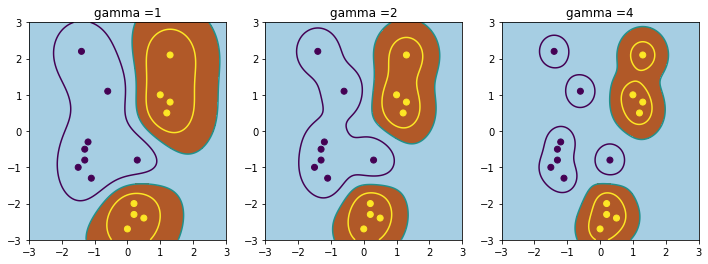

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

plt.figure(1, figsize=(4*len(gamma_option), 4))

for i, gamma in enumerate(gamma_option, 1):
  svm = SVC(kernel='rbf', gamma = gamma)
  svm.fit(X,Y)
  plt.subplot(1, len(gamma_option), i)
  plt.scatter(X[:,0], X[:,1], c=Y, zorder = 10)
  XX, YY = np.mgrid[-3:3:200j, -3:3:200j]

  Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()])
  Z = Z.reshape(XX.shape)

  plt.pcolormesh(XX, YY, Z>0, cmap = plt.cm.Paired)
  plt.contour(XX, YY, Z, levels=[-.5,0,.5])
  plt.title('gamma ='+ str(gamma))

plt.show()

심전도 데이터로 태아 상태 분류

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ML&DM/CTG.xls', "Raw Data")

X = df.iloc[1:2126, 3:-2].values
Y = df.iloc[1:2126, -1].values

In [ ]:
df.head(10)

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,0.0,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,0.0,0.0,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,0.0,0.0,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,0.0,0.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,Fmcs_1.txt,1996-05-03,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,0.0,0.0,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
6,Fmcs_2.txt,1996-05-03,CTG0006.txt,0.0,953.0,134.0,134.0,1.0,0.0,10.0,26.0,5.9,0.0,0.0,9.0,0.0,2.0,0.0,150.0,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
7,Fmcs_2.txt,1996-05-03,CTG0007.txt,240.0,953.0,134.0,134.0,1.0,0.0,9.0,29.0,6.3,0.0,0.0,6.0,0.0,2.0,0.0,150.0,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
8,Hasc_1.txt,1995-02-22,CTG0008.txt,62.0,679.0,122.0,122.0,0.0,0.0,0.0,83.0,0.5,6.0,15.6,0.0,0.0,0.0,0.0,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0
9,Hasc_1.txt,1995-02-22,CTG0009.txt,120.0,779.0,122.0,122.0,0.0,0.0,1.0,84.0,0.5,5.0,13.6,0.0,0.0,0.0,0.0,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0


In [ ]:
from collections import Counter
Counter(Y)

Counter({1.0: 1654, 2.0: 295, 3.0: 176})

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import timeit

svc = SVC(kernel = 'rbf')
parameters = {'C':(100,1000,10000,10000),
              'gamma':(1e-8, 1e-7, 1e-6, 1e-5)}
grid_search = GridSearchCV(svc, parameters, n_jobs=-1, cv=3)

start_time = timeit.default_timer()
grid_search.fit(x_train, y_train)

print("--- %0.3fs seconds ---" %(timeit.default_timer()-start_time))

--- 7.012s seconds ---


In [ ]:
grid_search.best_params_

{'C': 10000, 'gamma': 1e-07}

In [ ]:
grid_search.best_score_

0.9023469877415696

In [ ]:
svc_best = grid_search.best_estimator_
accuracy = svc_best.score(x_test, y_test)
print("The Accuracy on testing set is : {0:.1f}%".format(accuracy*100))

The Accuracy on testing set is : 90.4%


In [ ]:
from sklearn.metrics import classification_report

prediction = svc_best.predict(x_test)
report = classification_report(y_test, prediction)
print(report)